In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np
df = fetch_california_housing()
dataset = pd.DataFrame(df.data)
dataset.columns = df.feature_names
dataset.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [2]:
X=dataset
y=df.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



In [5]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regression, X_train, y_train,scoring='neg_mean_squared_error', cv = 10)
np.mean(mse)

-0.5221889833984605

In [6]:
reg_pred= regression.predict(X_test)
reg_pred

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279])

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


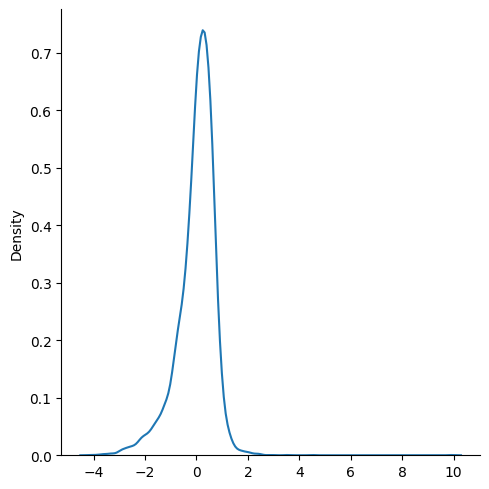

In [7]:
#using seaborn for visualizing 
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')


In [8]:
#finding the score
from sklearn.metrics import r2_score
score = r2_score(reg_pred, y_test)
score

0.3395742960386734

Ridge Regression

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge_regression = Ridge()
paramaters = {'alpha' : [1,10,20,30,40,50,60,70,80,90]}
ridge_cv = GridSearchCV(ridge_regression, paramaters, scoring= 'neg_mean_squared_error',cv=5)


In [10]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [11]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 1}
-0.5230483508915927


In [12]:
ridge_pred= ridge_cv.predict(X_test)
print(y_pred)

NameError: name 'y_pred' is not defined

Generation visually

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


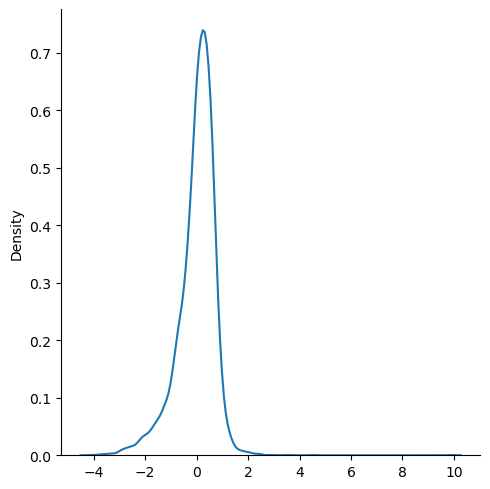

In [ ]:
sns.displot(ridge_pred-y_test,kind= 'kde')

Find the best score

In [ ]:
score = r2_score(ridge_pred,y_test)
print(score)

0.33929505248553027


Lasso Regression


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
paramaters = {'alpha': [0.1,1,0.001,0.0001]}
Lassocv = GridSearchCV(lasso,paramaters,scoring = 'neg_mean_squared_error',cv = 5)
Lassocv.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.1, 1, 0.001, 0.0001]},
             scoring='neg_mean_squared_error')

In [ ]:
print(Lassocv.best_params_)
print(Lassocv.best_score_)

{'alpha': 0.001}
-0.5227499876561102


In [ ]:

Lasso_pred= Lassocv.predict(X_test)


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


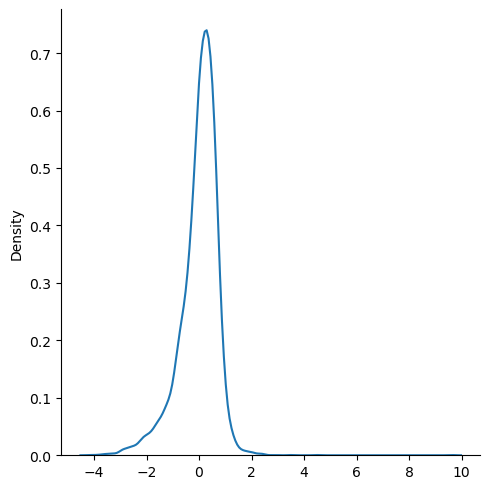

In [ ]:
sns.displot(Lasso_pred-y_test,kind= "kde")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, Lasso_pred)
r2 = r2_score(y_test, Lasso_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error: 0.5362
R2 Score: 0.5976
